# Capstone Project - The Battle of the Neighborhoods (Week 1)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

When you have to book a hotel in a new city, it is hard to know which hotels are better in terms of location. The aim of this project, is to group the hotels of one city by, we can say, its "flavour". By flavour, we mean how is the **taste of the sorrounding area of each hotel**. I think that selecting only the venues of our interest when we are travelling to another city, bucketing the hotels sharing common venues, and finally using wordmaps to get the big picture, we can have a proxy of what would be the taste of the sorrounding area of each hotel. To test this project I choose the **city of Boston**, as I was travelling very frequently there for almost three years, and I really want to come back again someday. The venues that we are selecting are:

* Monument / Landmark
* Historic Site
* Restaurants
* Coffee Shop
* Food & Drink Shop
* Bakery
* Park
* Museums
* River
* Irish Pub
* Steakhouse
* Lake
* Breakfast Spot
* Rental Car Location
* Pharmacy
* Harbor / Marina
* Street Food Gathering
* Train Station
* Bus Line

## Data <a name="data"></a>

The data we are using within this project are:

* Foursquare Data
* Coordinates of four selected areas from Boston. This coordinates was manually obtained using google.

The steps followed to get the final buckets and its linked wordmaps are:

* We **choose five stragegic points of Boston** to cover the area of my interest. There is a map showing where are the five points.
* We make a query to Four Square for each of the previous points to **get all the sorrounding hotels (radius = 10.000 meters)**.
* Then we have a **list of Hotels** with its coordinates. We drop duplicates and plot all the hotels in a new map.
* Next step is to make a query to four square **getting the sorrounding venues of each hotel (radious = 500 meters)**.
* We filter **only the desired venues** and normalize the data.
* Using the normalized data we perform the K means algorithmn setting the **number of buckets to 7**.
* We **plot the bucketted hotels** in a new map.
* Finally we **generate one wordmap** for each bucket so we can see what is the flavour of each bucket.
* Now we have to choose what is the bucket we like the most and book one of its hotels ;)

## Starting the Project
---

In [18]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

#### 1. Installing Folium to print the maps

In [19]:
!pip install folium

In [20]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#### 2. Getting the coordinates of the five strategic points:
* Boston Center.
* Harvard University.
* Dorchester.
* Brookline.
* Chelsea.

In [21]:
address = 'Boston'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [22]:
# Latitude and Longitude of Harvard University. I get this coordinates from internet.

latitude2 = 42.374443
longitude2 = -71.116943
print('The geograpical coordinate of Harvard University, Boston are {}, {}.'.format(latitude2, longitude2))


The geograpical coordinate of Harvard University, Boston are 42.374443, -71.116943.


In [23]:
# Latitude and Longitude of Dorchester. I get this coordinates from internet.

latitude3 = 42.302708
longitude3 = -71.072105
print('The geograpical coordinate of Dorchester, Boston are {}, {}.'.format(latitude3, longitude3))


The geograpical coordinate of Dorchester, Boston are 42.302708, -71.072105.


In [24]:
# Latitude and Longitude of Brookline. I get this coordinates from internet.

latitude4 = 42.332218
longitude4 = -71.121483
print('The geograpical coordinate of Brookline, Boston are {}, {}.'.format(latitude4, longitude4))

The geograpical coordinate of Brookline, Boston are 42.332218, -71.121483.


In [25]:
# Latitude and Longitude of Chelsea. I get this coordinates from internet.

latitude5 = 42.3917638
longitude5 = -71.0328284
print('The geograpical coordinate of Chelsea, Boston are {}, {}.'.format(latitude4, longitude4))


The geograpical coordinate of Chelsea, Boston are 42.332218, -71.121483.


#### 3. Plotting the strategic point in the map.

In [26]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
#for lat, lng, label in latitude, longitude, 'Toronto':
label = folium.Popup('Boston', parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup='Boston',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude2, longitude2],
    radius=5,
    popup='Harvard',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)
folium.CircleMarker(
    [latitude3, longitude3],
    radius=5,
    popup='Dorchester',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude4, longitude4],
    radius=5,
    popup='Brookline',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
folium.CircleMarker(
    [latitude5, longitude5],
    radius=5,
    popup='Chelsea',
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_boston)  
    
map_boston

## Getting the List of Hotels
---

#### 1. Conecting to Foursquare

In [27]:
CLIENT_ID = 'V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM' # your Foursquare ID
CLIENT_SECRET = 'ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL' # your Foursquare Secret
ACCESS_TOKEN = 'OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN'
VERSION = '20180604' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM
CLIENT_SECRET:ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL


#### 2. Getting the Hotels sorrounding Boston Center

In [28]:
search_query = 'Hotel'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.3602534,-71.0582912&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel&radius=10000&limit=1000'

In [92]:
results = requests.get(url).json()

#### 3. Getting the Hotels sorrounding the Harvard University

In [31]:
search_query2 = 'Hotel2'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2,ACCESS_TOKEN, VERSION, search_query2, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.374443,-71.116943&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel2&radius=10000&limit=1000'

In [93]:
results2 = requests.get(url).json()

#### 4. Getting the Hotels sorrounding Dorchester

In [34]:
search_query3 = 'Hotel3'
radius = 10000
print(search_query + ' .... OK!')

Hotel .... OK!


In [35]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude3, longitude3,ACCESS_TOKEN, VERSION, search_query3, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.302708,-71.072105&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel3&radius=10000&limit=1000'

In [94]:
results3 = requests.get(url).json()


#### 5. Getting the Hotels sorrounding Brookline

In [37]:
search_query4 = 'Hotel4'
radius = 10000
print(search_query + ' .... OK!')


Hotel .... OK!


In [38]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude4, longitude4,ACCESS_TOKEN, VERSION, search_query4, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.332218,-71.121483&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel4&radius=10000&limit=1000'

In [95]:
results4 = requests.get(url).json()


#### 5. Getting the Hotels sorrounding Chelsea

In [40]:
search_query5 = 'Hotel5'
radius = 10000
print(search_query5 + ' .... OK!')


Hotel5 .... OK!


In [41]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude5, longitude5,ACCESS_TOKEN, VERSION, search_query5, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=V5WZ3224L3CJMBORRTRGZWIA5WHQKTXQKWO2H3AIN1X4JXQM&client_secret=ZXCRS32S04XLSSKBJMME3XE5D4XADXKRFCLIWK1THX4O12NL&ll=42.3917638,-71.0328284&oauth_token=OQQ4P2F5S2BELTP4W4YCNTE2SDWSUMQHIOELIBD3UW5MMSXN&v=20180604&query=Hotel5&radius=10000&limit=1000'

In [96]:
results5 = requests.get(url).json()

#### 6. Appending all the hotels in one single dataframe

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
data_hotels = json_normalize(venues)

venues2 = results2['response']['venues']
data_hotels2 = json_normalize(venues2)

venues3 = results3['response']['venues']
data_hotels3 = json_normalize(venues3)

venues4 = results4['response']['venues']
data_hotels4 = json_normalize(venues4)

venues5 = results5['response']['venues']
data_hotels5 = json_normalize(venues5)

data_hotels = data_hotels.append(data_hotels2, ignore_index=True)
data_hotels = data_hotels.append(data_hotels3, ignore_index=True)
data_hotels = data_hotels.append(data_hotels4, ignore_index=True)
data_hotels = data_hotels.append(data_hotels5, ignore_index=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [44]:
# filtering the desired columns
filtered_columns = ['name','location.address','location.lat','location.lng']
data_hotels_filtered = data_hotels.loc[:, filtered_columns]
data_hotels_filtered

name      location.address  \
0        Millennium Bostonian Hotel Boston           26 North St   
1                  Kimpton Nine Zero Hotel         90 Tremont St   
2                            Godfrey Hotel     505 Washington St   
3                       Kimpton Onyx Hotel       155 Portland St   
4    The Envoy Hotel, Autograph Collection         70 Sleeper St   
..                                     ...                   ...   
245                    Battery Wharf Hotel       3 Battery Wharf   
246                  Kimpton Marlowe Hotel  25 Edwin H Land Blvd   
247         Fitness Center at Revere Hotel         200 Stuart St   
248                      Boston Park Plaza           50 Park Plz   
249   Four Seasons Hotel One Dalton Street                   NaN   

     location.lat  location.lng  
0       42.361006    -71.056066  
1       42.357388    -71.060696  
2       42.354748    -71.061613  
3       42.364204    -71.061363  
4       42.353762    -71.048124  
..            ...           ...  
245     42.367366    -71.050332  
246     42.367964    -71.075195  
247     42.350552    -71.067574  
248     42.350748    -71.069919  
249     42.345680    -71.084130  

[250 rows x 4 columns]

In [45]:
data_hotels_filtered.columns = ['Hotel','Address','Latitude','Longitude']
data_hotels_filtered.head()

Hotel            Address   Latitude  \
0      Millennium Bostonian Hotel Boston        26 North St  42.361006   
1                Kimpton Nine Zero Hotel      90 Tremont St  42.357388   
2                          Godfrey Hotel  505 Washington St  42.354748   
3                     Kimpton Onyx Hotel    155 Portland St  42.364204   
4  The Envoy Hotel, Autograph Collection      70 Sleeper St  42.353762   

   Longitude  
0 -71.056066  
1 -71.060696  
2 -71.061613  
3 -71.061363  
4 -71.048124

#### 7. Dropping duplicates to get the final list of hotels

In [46]:
data_hotels_filtered.groupby(['Hotel']).size()

Hotel
1-93/Route 3 Split                                                  1
103.3 AMP Radio                                                     1
28-40 Park Street                                                   1
33 Adams                                                            1
331 adams st                                                        1
                                                                   ..
enVision Hotel Boston                                               1
enVision Hotel Boston-Everett, an Ascend Hotel Collection Member    1
fwresh Barber shop                                                  1
hotel bellevue                                                      1
hotel envoy                                                         5
Length: 168, dtype: int64

After dropping duplicates we get the hotel list.

In [47]:
data_hotels_filtered.drop_duplicates(inplace= True)
data_hotels_filtered.groupby(['Hotel']).size()

Hotel
1-93/Route 3 Split                                                  1
103.3 AMP Radio                                                     1
28-40 Park Street                                                   1
33 Adams                                                            1
331 adams st                                                        1
                                                                   ..
enVision Hotel Boston                                               1
enVision Hotel Boston-Everett, an Ascend Hotel Collection Member    1
fwresh Barber shop                                                  1
hotel bellevue                                                      1
hotel envoy                                                         1
Length: 168, dtype: int64

#### 8. Plotting all the hotels in the Boston map

In [48]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(data_hotels_filtered['Latitude'], data_hotels_filtered['Longitude'], data_hotels_filtered['Hotel']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Getting All the Selected Venues Sorrounding the Hotels
---

#### 1. Getting the list of venues

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
boston_venues = getNearbyVenues(names=data_hotels_filtered['Hotel'],latitudes=data_hotels_filtered['Latitude'], longitudes=data_hotels_filtered['Longitude'])


Millennium Bostonian Hotel Boston
Kimpton Nine Zero Hotel
Godfrey Hotel
Kimpton Onyx Hotel
The Envoy Hotel, Autograph Collection
Club Quarters Hotel in Boston
Hotel Indigo Boston Garden
The Liberty Hotel
Elite Hotel
Four Seasons Hotel Boston
The Boxer Boston Hotel
The Langham Boston Hotel
Boston Harbor Hotel
XV Beacon Hotel
Battery Wharf Hotel
The Hotel Boston
Liberty Hotel Gym
Kimpton Marlowe Hotel
Scampo at The Liberty Hotel
Liberty Hotel Valet
Revere Hotel Boston Common
Cambria Hotel Boston, Downtown-South Boston
Liberty Hotel Chestnut Meeting Room
hotel envoy
Beacon Hill Hotel
Loews Boston Hotel
Fitness Center at Revere Hotel
The Lenox Hotel
Seaport Hotel & World Trade Center
Hotel 140
Morgan Group Hotel
Eliot Hotel
Boston Center for Physical Therapy & Sports Medicine at The Seaport Hotel
Elite Hotel Boston
Sheraton Boston Hotel
Omni Boston Hotel at the Seaport
hotel bellevue
Langham Hotel Pool
Hotel Commonwealth
Renaissance Hotel Concierge Lounge & Bar
Hotel PekA
XV Beacon Hotel
R

In [52]:
boston_venues.head()

Hotel  Hotel Latitude  Hotel Longitude  \
0  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
1  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
2  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
3  Millennium Bostonian Hotel Boston       42.361006       -71.056066   
4  Millennium Bostonian Hotel Boston       42.361006       -71.056066   

                                      Venue  Venue Latitude  Venue Longitude  \
0                      Boston Public Market       42.361950       -71.057466   
1                            North End Park       42.362488       -71.056477   
2  The Rose Kennedy Greenway - Mothers Walk       42.362640       -71.056407   
3                             Quincy Market       42.360106       -71.054881   
4                           Saus Restaurant       42.361076       -71.057054   

       Venue Category  
0              Market  
1                Park  
2                Park  
3       Historic Site  
4  Belgian Restaurant

In [53]:
# Checking that we are not loosing any hotel
boston_venues.Hotel.unique().shape

(168,)

#### 2. Exploring Venues Types

In [54]:
boston_venues['Venue Category'].unique()

array(['Market', 'Park', 'Historic Site', 'Belgian Restaurant',
       'Seafood Restaurant', 'Comedy Club', 'Record Shop', 'Coffee Shop',
       'Greek Restaurant', 'Deli / Bodega', 'Bakery', 'Sandwich Place',
       'Beer Bar', 'Monument / Landmark', 'Italian Restaurant',
       'Bagel Shop', 'Cosmetics Shop', 'Vegetarian / Vegan Restaurant',
       'Pizza Place', 'Donut Shop', 'Neighborhood', 'Yoga Studio',
       'Boutique', 'Bar', 'Circus', 'Food Truck',
       'Mediterranean Restaurant', 'Gourmet Shop', 'Pub', 'Hotel', 'Café',
       'Farmers Market', 'Irish Pub', 'Salad Place', 'Juice Bar',
       'Thai Restaurant', 'Fish Market', 'Salon / Barbershop',
       'Grocery Store', 'Pastry Shop', 'Trail', 'Steakhouse',
       'Asian Restaurant', 'Mexican Restaurant', 'Ski Chalet',
       'Falafel Restaurant', 'American Restaurant', 'Restaurant', 'Gym',
       'Library', 'New American Restaurant', 'French Restaurant',
       'Clothing Store', 'Sushi Restaurant', 'Gym / Fitness Center',


In [55]:
df_venues_type = pd.DataFrame (boston_venues['Venue Category'].unique(), columns=['Venue Category'])
df_venues_type.head()

Venue Category
0              Market
1                Park
2       Historic Site
3  Belgian Restaurant
4  Seafood Restaurant

In [56]:
df_venues_type[df_venues_type['Venue Category'].str.contains('Museum')]


Venue Category
69   History Museum
72           Museum
116      Art Museum
153  Science Museum

#### 3. Filtering the selected venues
* Monument / Landmark
* Historic Site
* Restaurants
* Coffee Shop
* Food & Drink Shop
* Bakery
* Park
* Museums
* River
* Irish Pub
* Steakhouse
* Lake
* Breakfast Spot
* Rental Car Location
* Pharmacy
* Harbor / Marina
* Street Food Gathering
* Train Station
* Bus Line

In [57]:
keys = ['Museum','Restaurant']

df_venues_type_tobe_deleted = df_venues_type[~df_venues_type['Venue Category'].isin(['Hotel','Monument / Landmark','Historic Site','Coffee Shop','Food & Drink Shop','Bakery','Park','River','Irish Pub','Steakhouse','Lake','Breakfast Spot','Rental Car Location','Pharmacy','Harbor / Marina','Street Food Gathering','Train Station','Bus Line'])
                                            &
                                            ~df_venues_type['Venue Category'].str.contains('|'.join(keys))
                                            ]



df_venues_type_tobe_deleted

Venue Category
0             Market
5        Comedy Club
6        Record Shop
9      Deli / Bodega
11    Sandwich Place
..               ...
315        Multiplex
316  Nature Preserve
317      Flea Market
318      IT Services
319  Warehouse Store

[248 rows x 1 columns]

In [58]:
boston_venues.groupby('Hotel').count()

Hotel Latitude  \
Hotel                                                                
1-93/Route 3 Split                                              10   
103.3 AMP Radio                                                 29   
28-40 Park Street                                               24   
33 Adams                                                        21   
331 adams st                                                    21   
...                                                            ...   
enVision Hotel Boston                                            6   
enVision Hotel Boston-Everett, an Ascend Hotel ...              19   
fwresh Barber shop                                              13   
hotel bellevue                                                  93   
hotel envoy                                                     68   

                                                    Hotel Longitude  Venue  \
Hotel                                                                        
1-93/Route 3 Split                                               10     10   
103.3 AMP Radio                                                  29     29   
28-40 Park Street                                                24     24   
33 Adams                                                         21     21   
331 adams st                                                     21     21   
...                                                             ...    ...   
enVision Hotel Boston                                             6      6   
enVision Hotel Boston-Everett, an Ascend Hotel ...               19     19   
fwresh Barber shop                                               13     13   
hotel bellevue                                                   93     93   
hotel envoy                                                      68     68   

                                                    Venue Latitude  \
Hotel                                                                
1-93/Route 3 Split                                              10   
103.3 AMP Radio                                                 29   
28-40 Park Street                                               24   
33 Adams                                                        21   
331 adams st                                                    21   
...                                                            ...   
enVision Hotel Boston                                            6   
enVision Hotel Boston-Everett, an Ascend Hotel ...              19   
fwresh Barber shop                                              13   
hotel bellevue                                                  93   
hotel envoy                                                     68   

                                                    Venue Longitude  \
Hotel                                                                 
1-93/Route 3 Split                                               10   
103.3 AMP Radio                                                  29   
28-40 Park Street                                                24   
33 Adams                                                         21   
331 adams st                                                     21   
...                                                             ...   
enVision Hotel Boston                                             6   
enVision Hotel Boston-Everett, an Ascend Hotel ...               19   
fwresh Barber shop                                               13   
hotel bellevue                                                   93   
hotel envoy                                                      68   

                                                    Venue Category  
Hotel                                                               
1-93/Route 3 Split                                              10  
103.3 AMP Radio                                                 29  
28-40 Park Stre

In [59]:
print('There are {} uniques categories.'.format(len(boston_venues['Venue Category'].unique())))

There are 320 uniques categories.


#### 4. Getting the number of venues by each hotel

In [60]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Hotel'] = boston_venues['Hotel'] 

In [61]:
boston_onehot.columns

Index(['ATM', 'Accessories Store', 'Afghan Restaurant', 'African Restaurant',
       'Airport', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=320)

In [62]:
# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[list(boston_onehot.columns).index('Hotel')]] + list(boston_onehot.columns[0:list(boston_onehot.columns).index('Hotel')]) + list(boston_onehot.columns[list(boston_onehot.columns).index('Hotel')+1:])

boston_onehot = boston_onehot[fixed_columns]

boston_onehot.columns

Index(['Hotel', 'ATM', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'Airport Lounge', 'Airport Service',
       'Airport Terminal', 'American Restaurant',
       ...
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Whisky Bar',
       'Wine Bar', 'Wine Shop', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=320)

In [63]:
boston_grouped = boston_onehot.groupby('Hotel').mean().reset_index()
boston_grouped.head()

Hotel  ATM  Accessories Store  Afghan Restaurant  \
0  1-93/Route 3 Split  0.0                0.0                0.0   
1     103.3 AMP Radio  0.0                0.0                0.0   
2   28-40 Park Street  0.0                0.0                0.0   
3            33 Adams  0.0                0.0                0.0   
4        331 adams st  0.0                0.0                0.0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                 0.0      0.0             0.0              0.0   
1                 0.0      0.0             0.0              0.0   
2                 0.0      0.0             0.0              0.0   
3                 0.0      0.0             0.0              0.0   
4                 0.0      0.0             0.0              0.0   

   Airport Terminal  American Restaurant  ...  Video Store  \
0               0.0             0.100000  ...          0.0   
1               0.0             0.034483  ...          0.0   
2               0.0             0.000000  ...          0.0   
3               0.0             0.000000  ...          0.0   
4               0.0             0.000000  ...          0.0   

   Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  Wine Shop  \
0               0.000000              0.0         0.0       0.0   0.000000   
1               0.000000              0.0         0.0       0.0   0.000000   
2               0.000000              0.0         0.0       0.0   0.041667   
3               0.190476              0.0         0.0       0.0   0.000000   
4               0.095238              0.0         0.0       0.0   0.000000   

   Women's Store  Yoga Studio  Zoo  Zoo Exhibit  
0            0.0          0.0  0.0          0.0  
1            0.0          0.0  0.0          0.0  
2            0.0          0.0  0.0          0.0  
3            0.0          0.0  0.0          0.0  
4            0.0          0.0  0.0          0.0  

[5 rows x 320 columns]

In [64]:
boston_grouped.shape

(168, 320)

We filter only the selected venues. In this dataframe the venues are columns.

In [65]:
boston_grouped_filtered = boston_grouped.drop(columns=df_venues_type_tobe_deleted['Venue Category'])

In [66]:
boston_grouped_filtered

Hotel  Afghan Restaurant  \
0                                   1-93/Route 3 Split                0.0   
1                                      103.3 AMP Radio                0.0   
2                                    28-40 Park Street                0.0   
3                                             33 Adams                0.0   
4                                         331 adams st                0.0   
..                                                 ...                ...   
163                              enVision Hotel Boston                0.0   
164  enVision Hotel Boston-Everett, an Ascend Hotel...                0.0   
165                                 fwresh Barber shop                0.0   
166                                     hotel bellevue                0.0   
167                                        hotel envoy                0.0   

     African Restaurant  American Restaurant  Arepa Restaurant  Art Museum  \
0                   0.0             0.100000               0.0    0.000000   
1                   0.0             0.034483               0.0    0.000000   
2                   0.0             0.000000               0.0    0.000000   
3                   0.0             0.000000               0.0    0.000000   
4                   0.0             0.000000               0.0    0.000000   
..                  ...                  ...               ...         ...   
163                 0.0             0.000000               0.0    0.000000   
164                 0.0             0.000000               0.0    0.000000   
165                 0.0             0.076923               0.0    0.000000   
166                 0.0             0.032258               0.0    0.000000   
167                 0.0             0.000000               0.0    0.029412   

     Asian Restaurant  Australian Restaurant    Bakery  Belgian Restaurant  \
0            0.000000                    0.0  0.000000                 0.0   
1            0.000000                    0.0  0.000000                 0.0   
2            0.000000                    0.0  0.083333                 0.0   
3            0.000000                    0.0  0.000000                 0.0   
4            0.000000                    0.0  0.000000                 0.0   
..                ...                    ...       ...                 ...   
163          0.000000                    0.0  0.000000                 0.0   
164          0.000000                    0.0  0.000000                 0.0   
165          0.000000                    0.0  0.000000                 0.0   
166          0.000000                    0.0  0.010753                 0.0   
167          0.044118                    0.0  0.029412                 0.0   

     ...  Taiwanese Restaurant  Tapas Restaurant  Thai Restaurant  \
0    ...                   0.0               0.0         0.000000   
1    ...                   0.0               0.0         0.000000   
2    ...                   0.0               0.0         0.041667   
3    ...                   0.0               0.0         0.000000   
4    ...                   0.0               0.0         0.000000   
..   ...                   ...               ...              ...   
163  ...                   0.0               0.0         0.000000   
164  ...                   0.0               0.0         0.000000   
165  ...                   0.0               0.0         0.000000   
166  ...                   0.0               0.0         0.000000   
167  ...                   0.0               0.0         0.000000   

     Theme Restaurant  Tibetan Restaurant  Train Station  Turkish Restaurant  \
0                 0.0                 0.0            0.0                 0.0   
1                 0.0                 0.0            0.0                 0.0   
2                 0.0                 0.0            0.0                 0.0   
3                 0.0                 0.0            0.0                 0.0   
4                 0.0

#### 5. Getting the 10 most common venues of each hotel

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hotel']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hotels_venues_sorted = pd.DataFrame(columns=columns)
hotels_venues_sorted['Hotel'] = boston_grouped_filtered['Hotel']

for ind in np.arange(boston_grouped_filtered.shape[0]):
    hotels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped_filtered.iloc[ind,:], num_top_venues)

hotels_venues_sorted.head()

Hotel  1st Most Common Venue 2nd Most Common Venue  \
0  1-93/Route 3 Split            Coffee Shop            Restaurant   
1     103.3 AMP Radio    American Restaurant              Pharmacy   
2   28-40 Park Street                 Bakery     Korean Restaurant   
3            33 Adams  Vietnamese Restaurant            Restaurant   
4        331 adams st  Vietnamese Restaurant    Seafood Restaurant   

           3rd Most Common Venue      4th Most Common Venue  \
0            American Restaurant      Vietnamese Restaurant   
1                     Steakhouse                       Park   
2  Vegetarian / Vegan Restaurant            Thai Restaurant   
3                           Park             Breakfast Spot   
4           Fast Food Restaurant  Cajun / Creole Restaurant   

       5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0            Harbor / Marina    Falafel Restaurant     Fast Food Restaurant   
1      Vietnamese Restaurant      Greek Restaurant       Falafel Restaurant   
2  Middle Eastern Restaurant            Restaurant         Sushi Restaurant   
3        Rental Car Location  Caribbean Restaurant  New American Restaurant   
4         African Restaurant       Harbor / Marina       Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0      Food & Drink Shop     French Restaurant       Greek Restaurant  
1   Fast Food Restaurant     Food & Drink Shop      French Restaurant  
2  Vietnamese Restaurant     French Restaurant   Ethiopian Restaurant  
3        Harbor / Marina      Greek Restaurant   Ethiopian Restaurant  
4      Food & Drink Shop     French Restaurant       Greek Restaurant

In [69]:
hotels_venues_sorted.shape

(168, 11)

## Clustering with K Means
---

#### 1. Executing K Means and getting clusters

We choose to split the hotels in seven gruoups and using only the filtered venues.

In [70]:
from sklearn.cluster import KMeans
# set number of clusters

kclusters = 7

boston_grouped_clustering = boston_grouped_filtered.drop('Hotel', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

#### 2. Assigning the clusters to each hotel

In [71]:
# add clustering labels
hotels_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boston_merged = data_hotels_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each hotel
boston_merged = boston_merged.join(hotels_venues_sorted.set_index('Hotel'), on='Hotel')


In [72]:
boston_merged.head(10) # check the last columns!

Hotel            Address   Latitude  \
0      Millennium Bostonian Hotel Boston        26 North St  42.361006   
1                Kimpton Nine Zero Hotel      90 Tremont St  42.357388   
2                          Godfrey Hotel  505 Washington St  42.354748   
3                     Kimpton Onyx Hotel    155 Portland St  42.364204   
4  The Envoy Hotel, Autograph Collection      70 Sleeper St  42.353762   
5          Club Quarters Hotel in Boston  161 Devonshire St  42.356213   
6             Hotel Indigo Boston Garden      280 Friend St  42.364785   
7                      The Liberty Hotel     215 Charles St  42.362071   
8                            Elite Hotel      1 S Market St  42.359653   
9              Four Seasons Hotel Boston    200 Boylston St  42.352468   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -71.056066               2    Italian Restaurant    Seafood Restaurant   
1 -71.060696               0           Coffee Shop   American Restaurant   
2 -71.061613               0           Coffee Shop    Chinese Restaurant   
3 -71.061363               2    Italian Restaurant                Bakery   
4 -71.048124               0           Coffee Shop    Italian Restaurant   
5 -71.057531               0         Historic Site           Coffee Shop   
6 -71.061598               0    Italian Restaurant                  Park   
7 -71.070095               0    Italian Restaurant     Hotpot Restaurant   
8 -71.055940               2    Italian Restaurant    Seafood Restaurant   
9 -71.068752               0                  Park    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0                  Park                Bakery            Historic Site   
1         Historic Site            Steakhouse  New American Restaurant   
2   American Restaurant         Historic Site         Asian Restaurant   
3                  Park    Seafood Restaurant              Coffee Shop   
4            Steakhouse    Seafood Restaurant               Art Museum   
5   American Restaurant    Seafood Restaurant               Steakhouse   
6           Coffee Shop   American Restaurant      Japanese Restaurant   
7     French Restaurant                  Park                   Bakery   
8         Historic Site                  Park              Coffee Shop   
9   American Restaurant           Coffee Shop               Steakhouse   

      6th Most Common Venue          7th Most Common Venue  \
0               Coffee Shop            American Restaurant   
1        Italian Restaurant                     Restaurant   
2   New American Restaurant             Seafood Restaurant   
3  Mediterranean Restaurant            Japanese Restaurant   
4          Asian Restaurant                         Bakery   
5                 Irish Pub             Mexican Restaurant   
6        Seafood Restaurant                         Bakery   
7            History Museum                          River   
8                    Bakery            American Restaurant   
9        Seafood Restaurant  Vegetarian / Vegan Restaurant   

      8th Most Common Venue    9th Most Common Venue  \
0                Steakhouse      Monument / Landmark   
1        Falafel Restaurant                     Park   
2        Italian Restaurant               Restaurant   
3         Korean Restaurant          Thai Restaurant   
4   New American Restaurant               Restaurant   
5        Italian Restaurant  New American Restaurant   
6  Mediterranean Restaurant                Irish Pub   
7        Mexican Restaurant        Indian Restaurant   
8                Steakhouse      Monument / Landmark   
9             Historic Site                   Museum   

          10th Most Common Venue  
0               Greek Restaurant  
1             Mexican Restaurant  
2               Sushi Restaurant  
3  Vegetarian / Vegan Restaurant  
4       Mediterranean Restaurant  
5                     Restaurant  
6                Harbor

In [73]:
kclusters

7

#### 3. Plotting the clustered hotels

In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Hotel'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Generating Wordclouds for each Cluster
---

The aim is to get the big picture of each cluster.

#### 1. Installing Wordcloud

In [75]:
# install wordcloud
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

     |████████████████████████████████| 366 kB 17.8 MB/s eta 0:00:01
Wordcloud is installed and imported!


In [76]:
stopwords = set(STOPWORDS)

#### 2. Defining the function for printing the wordclouds of each cluster

In [77]:
def draw_wordcloud (boston_cluster):
    
    # instantiate a word cloud object
    boston_cluster_wc = WordCloud(
        background_color='white',
        max_words=20000,
        stopwords=stopwords
    )

    boston_cluster_str = ''


    #'\s+'

    for column in boston_cluster.columns:
        if column != 'Hotel':
            boston_cluster[column].replace('\s+', '_',regex=True, inplace = True)
            boston_cluster[column].replace('\n', ' ',regex=True, inplace = True)
            boston_cluster_str = boston_cluster_str + str(boston_cluster[column]).replace(column,'').replace('Name:','').replace(',','').replace('dtype: object','').replace('Length','')

    #boston_cluster0_str = str(boston_cluster0.iloc[0:,1:]).replace('Common Venue','')

    # generate the word cloud
    boston_cluster_wc.generate(boston_cluster_str)

    fig = plt.figure()
    fig.set_figwidth(25) # set width
    fig.set_figheight(31) # set height

    # display the cloud
    plt.imshow(boston_cluster_wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


### Cluster 0

In [78]:
boston_cluster0 = boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster0

Hotel  1st Most Common Venue  \
1                      Kimpton Nine Zero Hotel            Coffee Shop   
2                                Godfrey Hotel            Coffee Shop   
4        The Envoy Hotel, Autograph Collection            Coffee Shop   
5                Club Quarters Hotel in Boston          Historic Site   
6                   Hotel Indigo Boston Garden     Italian Restaurant   
..                                         ...                    ...   
221            A.J. Cabrita Hoteleria Bar Cafe  Vietnamese Restaurant   
231  Yawkey 5E | Corrigan Mineham Heart Center                 Museum   
232                                    The Row            Coffee Shop   
237                                     Hilton            Coffee Shop   
243                MBTA Back Bay Station (BBY)            Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue     4th Most Common Venue  \
1     American Restaurant         Historic Site                Steakhouse   
2      Chinese Restaurant   American Restaurant             Historic Site   
4      Italian Restaurant            Steakhouse        Seafood Restaurant   
5             Coffee Shop   American Restaurant        Seafood Restaurant   
6                    Park           Coffee Shop       American Restaurant   
..                    ...                   ...                       ...   
221       Harbor / Marina  Ethiopian Restaurant        Falafel Restaurant   
231    Italian Restaurant   American Restaurant  Mediterranean Restaurant   
232   American Restaurant                  Park                    Bakery   
237    Seafood Restaurant       Harbor / Marina                      Park   
243   American Restaurant    Seafood Restaurant        Italian Restaurant   

       5th Most Common Venue            6th Most Common Venue  \
1    New American Restaurant               Italian Restaurant   
2           Asian Restaurant          New American Restaurant   
4                 Art Museum                 Asian Restaurant   
5                 Steakhouse                        Irish Pub   
6        Japanese Restaurant               Seafood Restaurant   
..                       ...                              ...   
221     Fast Food Restaurant                Food & Drink Shop   
231       Mexican Restaurant                Hotpot Restaurant   
232       Seafood Restaurant  Southern / Soul Food Restaurant   
237               Restaurant              American Restaurant   
243         Asian Restaurant               Mexican Restaurant   

    7th Most Common Venue     8th Most Common Venue    9th Most Common Venue  \
1              Restaurant        Falafel Restaurant                     Park   
2      Seafood Restaurant        Italian Restaurant               Restaurant   
4                  Bakery   New American Restaurant               Restaurant   
5      Mexican Restaurant        Italian Restaurant  New American Restaurant   
6                  Bakery  Mediterranean Restaurant                Irish Pub   
..                    ...                       ...                      ...   
221     French Restaurant          Greek Restaurant            Historic Site   
231                Bakery            History Museum        French Restaurant   
232            Steakhouse        Mexican Restaurant         Greek Restaurant   
237            Steakhouse             Historic Site       Italian Restaurant   
243            Steakhouse                      Park  New American Restaurant   

       10th Most Common Venue  
1          Mexican Restaurant  
2            Sushi Restaurant  
4    Mediterranean Restaurant  
5                  Restaurant  
6             Harbor / Marina  
..                        ...  
221        Dim Sum Restaurant  
231                      Park  
232       Japanese Restaurant  
237          Greek Restaurant  
243                Restaurant  

[110 rows x 11 columns]

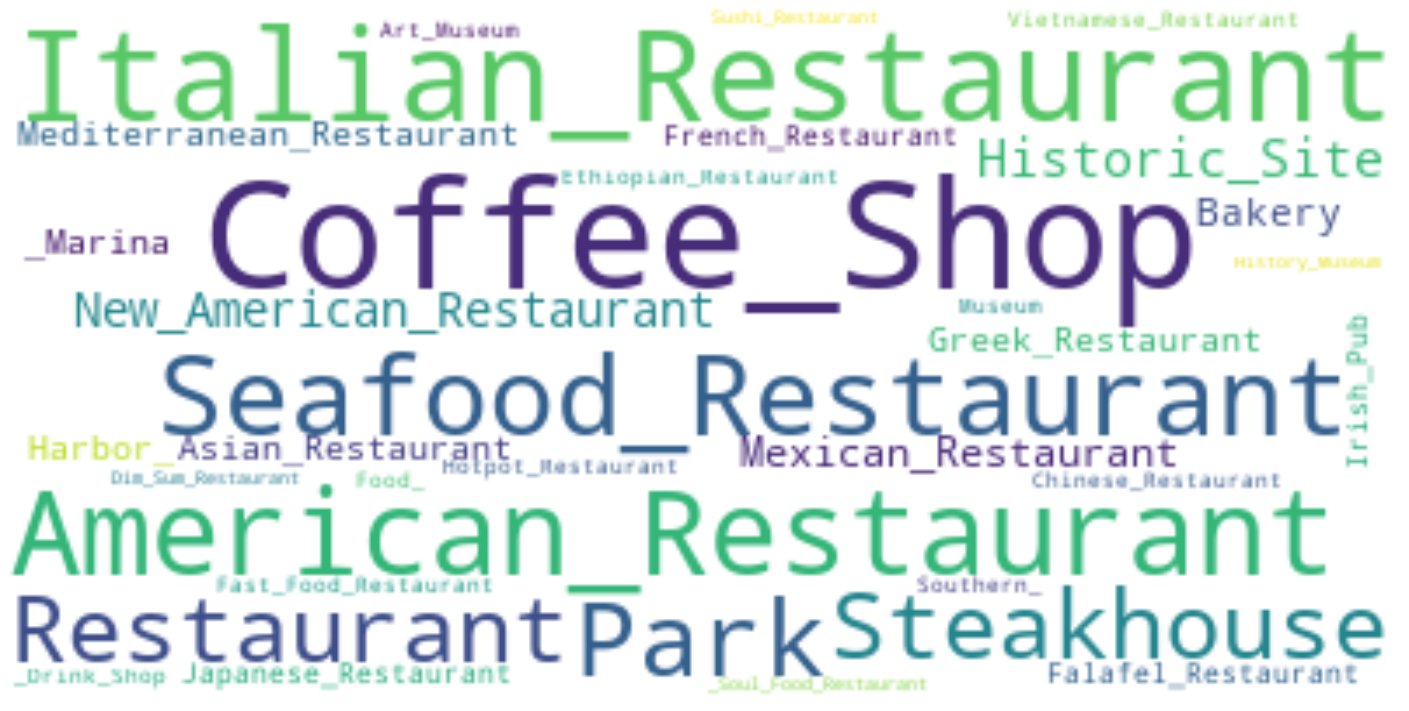

In [79]:
draw_wordcloud(boston_cluster0)

### Cluster 1

In [80]:
boston_cluster1 = boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster1

Hotel 1st Most Common Venue 2nd Most Common Venue  \
114  The Parenteau and Pug Hotel    Chinese Restaurant  Caribbean Restaurant   
126                       Gate 3    Chinese Restaurant                Bakery   
135         DoubleTree by Hilton    Chinese Restaurant                Bakery   

    3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
114              Pharmacy  Vietnamese Restaurant      Greek Restaurant   
126   American Restaurant       Asian Restaurant     French Restaurant   
135      Asian Restaurant     Italian Restaurant   Japanese Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
114    Falafel Restaurant  Fast Food Restaurant     Food & Drink Shop   
126    Dim Sum Restaurant           Coffee Shop      Sushi Restaurant   
135    Seafood Restaurant        Breakfast Spot     Korean Restaurant   

    9th Most Common Venue 10th Most Common Venue  
114     French Restaurant        Harbor / Marina  
126    Mexican Restaurant  Vietnamese Restaurant  
135     Hotpot Restaurant                   Park

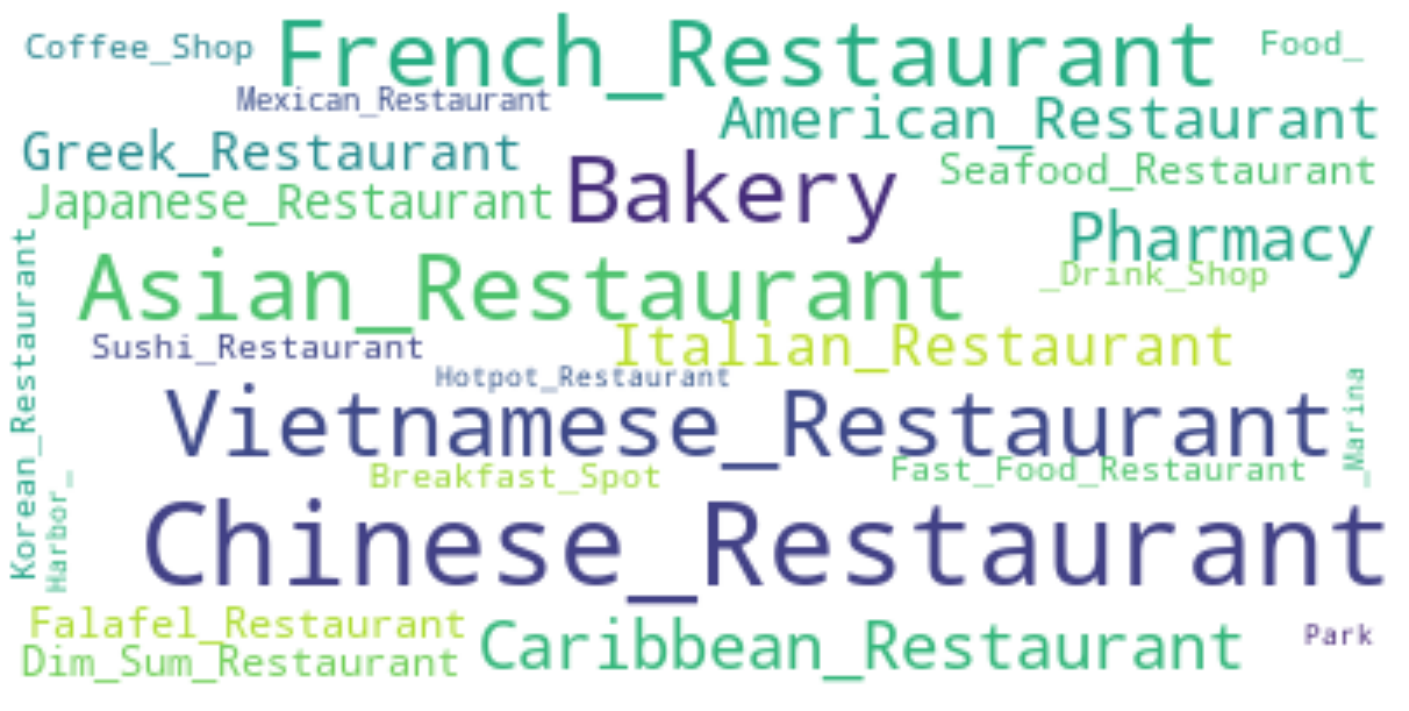

In [81]:
draw_wordcloud(boston_cluster1)

### Cluster 2

In [82]:
boston_cluster2 = boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster2

Hotel 1st Most Common Venue  \
0                    Millennium Bostonian Hotel Boston    Italian Restaurant   
3                                   Kimpton Onyx Hotel    Italian Restaurant   
8                                          Elite Hotel    Italian Restaurant   
11                            The Langham Boston Hotel    Seafood Restaurant   
12                                 Boston Harbor Hotel       Harbor / Marina   
14                                 Battery Wharf Hotel    Italian Restaurant   
23                                         hotel envoy    Italian Restaurant   
28                  Seaport Hotel & World Trade Center    Seafood Restaurant   
30                                  Morgan Group Hotel         Historic Site   
32   Boston Center for Physical Therapy & Sports Me...    Seafood Restaurant   
33                                  Elite Hotel Boston    Italian Restaurant   
35                    Omni Boston Hotel at the Seaport    Seafood Restaurant   
37                                  Langham Hotel Pool    Seafood Restaurant   
39            Renaissance Hotel Concierge Lounge & Bar    Seafood Restaurant   
40                                          Hotel PekA    Italian Restaurant   
42                 Renaissance Boston Waterfront Hotel    Seafood Restaurant   
65                                   MBTA Bus Line SL2    Seafood Restaurant   
96                                         J2H Digital       Harbor / Marina   
150  MBTA Bus Stop #242 | Seaport Blvd @ Seaport Ho...    Seafood Restaurant   
193                                       Prepare 4 VC    Italian Restaurant   
211               75 State Street Garage at 5 Broad St    Italian Restaurant   
227                                      Linea 5, inc.    Italian Restaurant   
234          Avid Hotels Boston Logan Airport - Revere    Italian Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0      Seafood Restaurant                  Park                Bakery   
3                  Bakery                  Park    Seafood Restaurant   
8      Seafood Restaurant         Historic Site                  Park   
11          Historic Site                  Park       Harbor / Marina   
12     Seafood Restaurant           Coffee Shop                  Park   
14        Harbor / Marina                  Park    Seafood Restaurant   
23            Coffee Shop      Asian Restaurant    Seafood Restaurant   
28             Restaurant   American Restaurant            Steakhouse   
30            Coffee Shop    Seafood Restaurant                  Park   
32    American Restaurant            Restaurant            Steakhouse   
33     Seafood Restaurant         Historic Site                  Park   
35    American Restaurant            Steakhouse            Restaurant   
37          Historic Site                  Park       Harbor / Marina   
39    American Restaurant            Steakhouse    Mexican Restaurant   
40     Seafood Restaurant                Bakery   American Restaurant   
42    American Restaurant            Steakhouse    Mexican Restaurant   
65    American Restaurant            Steakhouse    Mexican Restaurant   
96     Seafood Restaurant                  Park         Historic Site   
150   American Restaurant            Restaurant           Coffee Shop   
193    Seafood Restaurant                  Park         Historic Site   
211    Seafood Restaurant                  Park         Historic Site   
227       Harbor / Marina    Seafood Restaurant                  Park   
234                Bakery        Breakfast Spot           Coffee Shop   

        5th Most Common Venue     6th Most Common Venue  \
0               Historic Site               Coffee Shop   
3                 Coffee Shop  Mediterranean Restaurant   
8                 Coffee Shop                    Bakery   
11         Italian Restaurant                Steakhouse   
12         Italian Restaurant       American Restaurant   
14                   

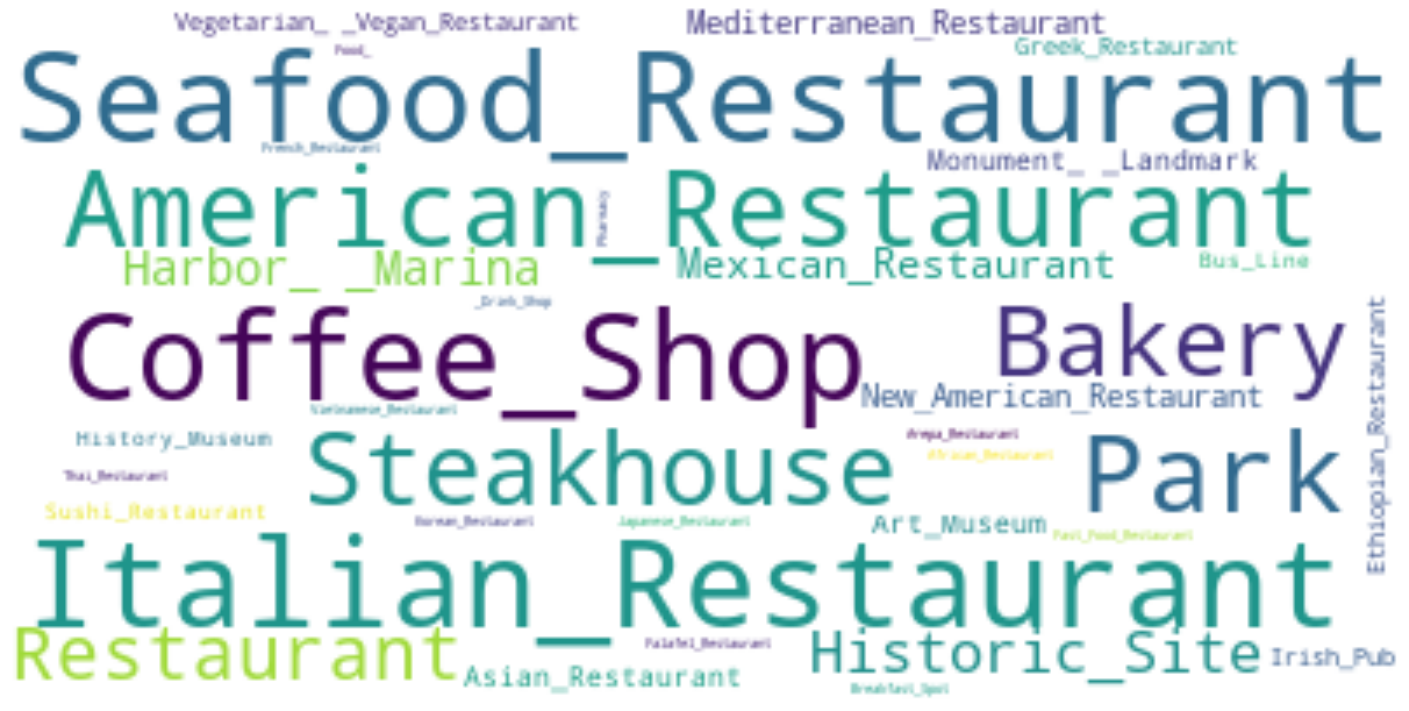

In [83]:
draw_wordcloud(boston_cluster2)

### Cluster 3

In [84]:
boston_cluster3 = boston_merged.loc[boston_merged['Cluster Labels'] == 3, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster3

Hotel 1st Most Common Venue 2nd Most Common Venue  \
167               49 Harrison                  Park     Korean Restaurant   
168                      MO4B                  Park     Korean Restaurant   
182     enVision Hotel Boston                  Park     Korean Restaurant   
186  Brookline Fire Station 4                  Park              Pharmacy   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
167  Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
168  Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
182  Ethiopian Restaurant    Falafel Restaurant  Fast Food Restaurant   
186   Japanese Restaurant  Ethiopian Restaurant    Falafel Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
167     Food & Drink Shop     French Restaurant      Greek Restaurant   
168     Food & Drink Shop     French Restaurant      Greek Restaurant   
182     Food & Drink Shop     French Restaurant      Greek Restaurant   
186  Fast Food Restaurant     Food & Drink Shop     French Restaurant   

    9th Most Common Venue 10th Most Common Venue  
167       Harbor / Marina  Vietnamese Restaurant  
168       Harbor / Marina  Vietnamese Restaurant  
182       Harbor / Marina  Vietnamese Restaurant  
186      Greek Restaurant  Vietnamese Restaurant

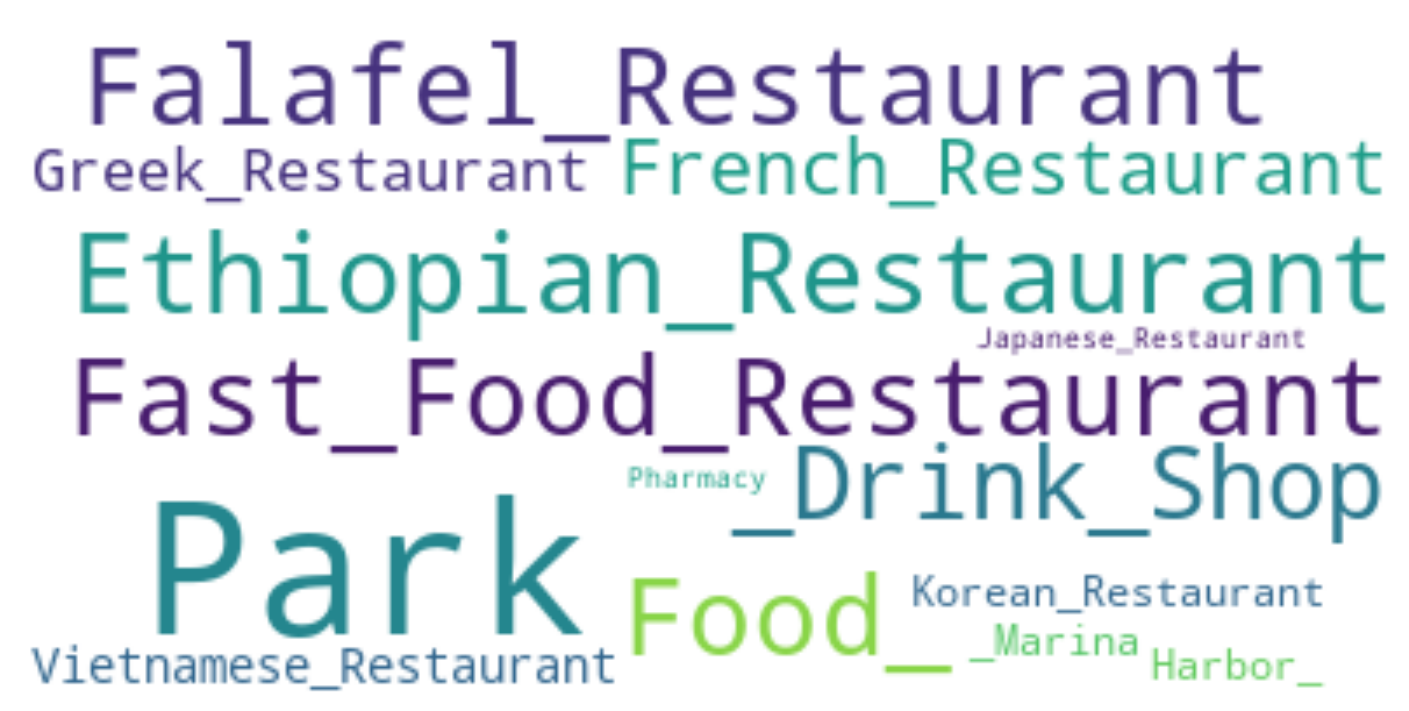

In [85]:
draw_wordcloud(boston_cluster3)

### Cluster 4

In [86]:
boston_cluster4 = boston_merged.loc[boston_merged['Cluster Labels'] == 4, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster4

Hotel 1st Most Common Venue  \
48                                       Kendall Hotel           Coffee Shop   
58                                          Terminal B           Coffee Shop   
82                                StuVi 2 Study Lounge           Coffee Shop   
87                                   Stuvi 2 Penthouse           Coffee Shop   
103                                    Baggage Claim A           Coffee Shop   
105                                            Gate A3           Coffee Shop   
122                                 1-93/Route 3 Split           Coffee Shop   
123                            MBTA CT3-Andrew Station           Coffee Shop   
163                                     BIDMC Palmer 4           Coffee Shop   
169                     Coffee Connection @ 45 Francis   American Restaurant   
170       AC Hotel by Marriott Boston Cleveland Circle           Coffee Shop   
174        City of Boston Public Works District 4 Yard           Coffee Shop   
184                                            Gate B4           Coffee Shop   
187                                            Gate A4           Coffee Shop   
203                                            Gate A5           Coffee Shop   
208                                            Gate C5           Coffee Shop   
210                                            Gate B5           Coffee Shop   
218                                         United 543           Coffee Shop   
220                                    Baggage Claim C           Coffee Shop   
223                            Connolly's Publik House           Coffee Shop   
224                                            Gate E5           Coffee Shop   
230  enVision Hotel Boston-Everett, an Ascend Hotel...           Coffee Shop   

       2nd Most Common Venue     3rd Most Common Venue  4th Most Common Venue  \
48   New American Restaurant  Mediterranean Restaurant    American Restaurant   
58        Seafood Restaurant                    Bakery             Restaurant   
82      Fast Food Restaurant        Mexican Restaurant    Japanese Restaurant   
87      Fast Food Restaurant        Mexican Restaurant    Japanese Restaurant   
103       Seafood Restaurant       American Restaurant                 Bakery   
105       Seafood Restaurant       American Restaurant                 Bakery   
122               Restaurant       American Restaurant  Vietnamese Restaurant   
123       Chinese Restaurant         Polish Restaurant  Vietnamese Restaurant   
163                 Pharmacy        Falafel Restaurant   Fast Food Restaurant   
169              Coffee Shop          Sushi Restaurant     Falafel Restaurant   
170       Mexican Restaurant                      Lake       Sushi Restaurant   
174                     Park         Hotpot Restaurant    Rental Car Location   
184       Seafood Restaurant                    Bakery             Restaurant   
187       Seafood Restaurant       American Restaurant                 Bakery   
203       Seafood Restaurant       American Restaurant                 Bakery   
208       Seafood Restaurant       American Restaurant        Harbor / Marina   
210       Seafood Restaurant                    Bakery        Harbor / Marina   
218    Vietnamese Restaurant        Dim Sum Restaurant   Ethiopian Restaurant   
220       Seafood Restaurant       American Restaurant       Asian Restaurant   
223               Restaurant                    Bakery                   Park   
224       Seafood Restaurant       American Restaurant        Harbor / Marina   
230     Fast Food Restaurant     Vietnamese Restaurant     Dim Sum Restaurant   

             5th Most Common Venue          6th Most Common Venue  \
48             Japanese Restaurant             Seafood Restaurant   
58              Chinese Restaurant                     Steakhouse   
82                  Breakfast Spot             Chinese Restaurant   
87                  Breakfast Spot             Chinese Restaurant   

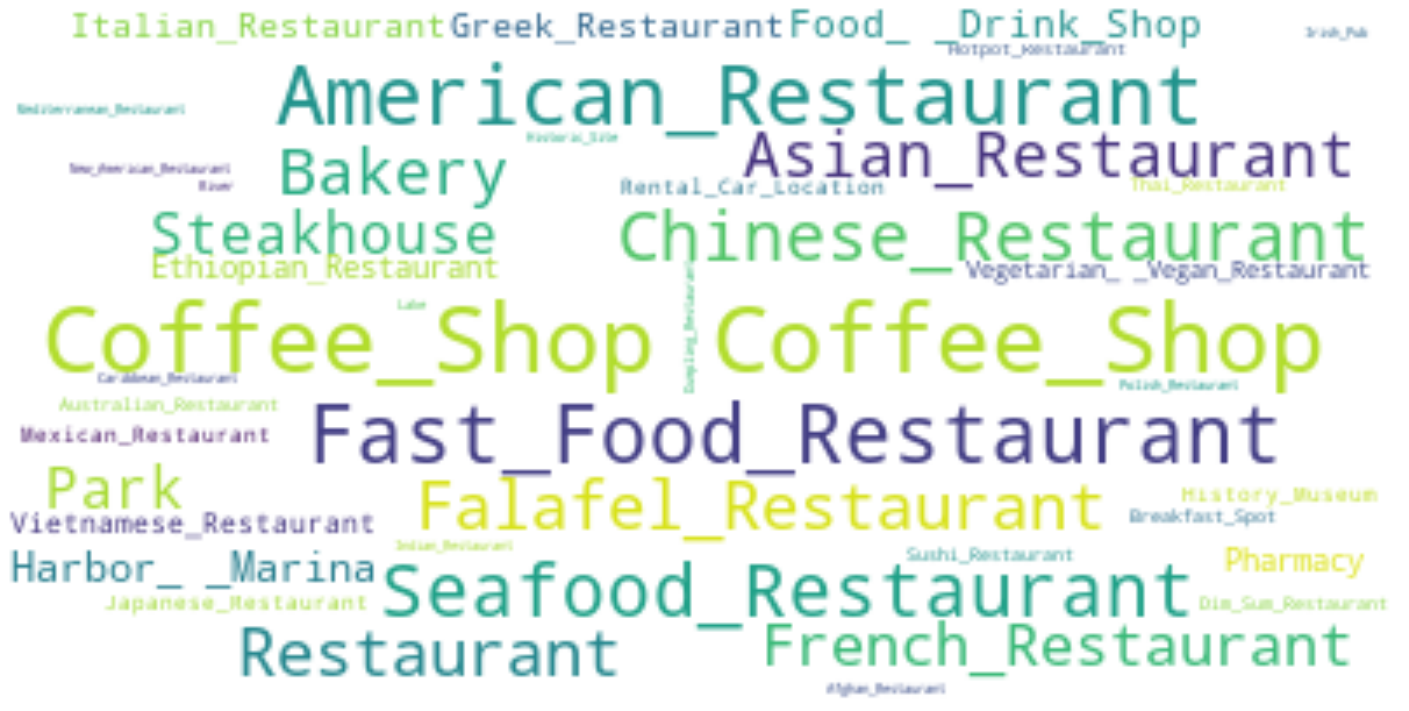

In [87]:
draw_wordcloud(boston_cluster4)

### Cluster 5

In [88]:
boston_cluster5 = boston_merged.loc[boston_merged['Cluster Labels'] == 5, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster5

Hotel 1st Most Common Venue  \
204  GL 55- Chelsea River East Boston   Rental Car Location   
214          Embassy Suites by Hilton   Rental Car Location   
219        Colwen Hotels / XSS Hotels   Rental Car Location   

     2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
204  Vietnamese Restaurant     Korean Restaurant   Ethiopian Restaurant   
214                   Park   American Restaurant  Vietnamese Restaurant   
219  Vietnamese Restaurant     Korean Restaurant   Ethiopian Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
204    Falafel Restaurant  Fast Food Restaurant     Food & Drink Shop   
214    Falafel Restaurant  Fast Food Restaurant     Food & Drink Shop   
219    Falafel Restaurant  Fast Food Restaurant     Food & Drink Shop   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
204     French Restaurant      Greek Restaurant        Harbor / Marina  
214     French Restaurant      Greek Restaurant        Harbor / Marina  
219     French Restaurant      Greek Restaurant        Harbor / Marina

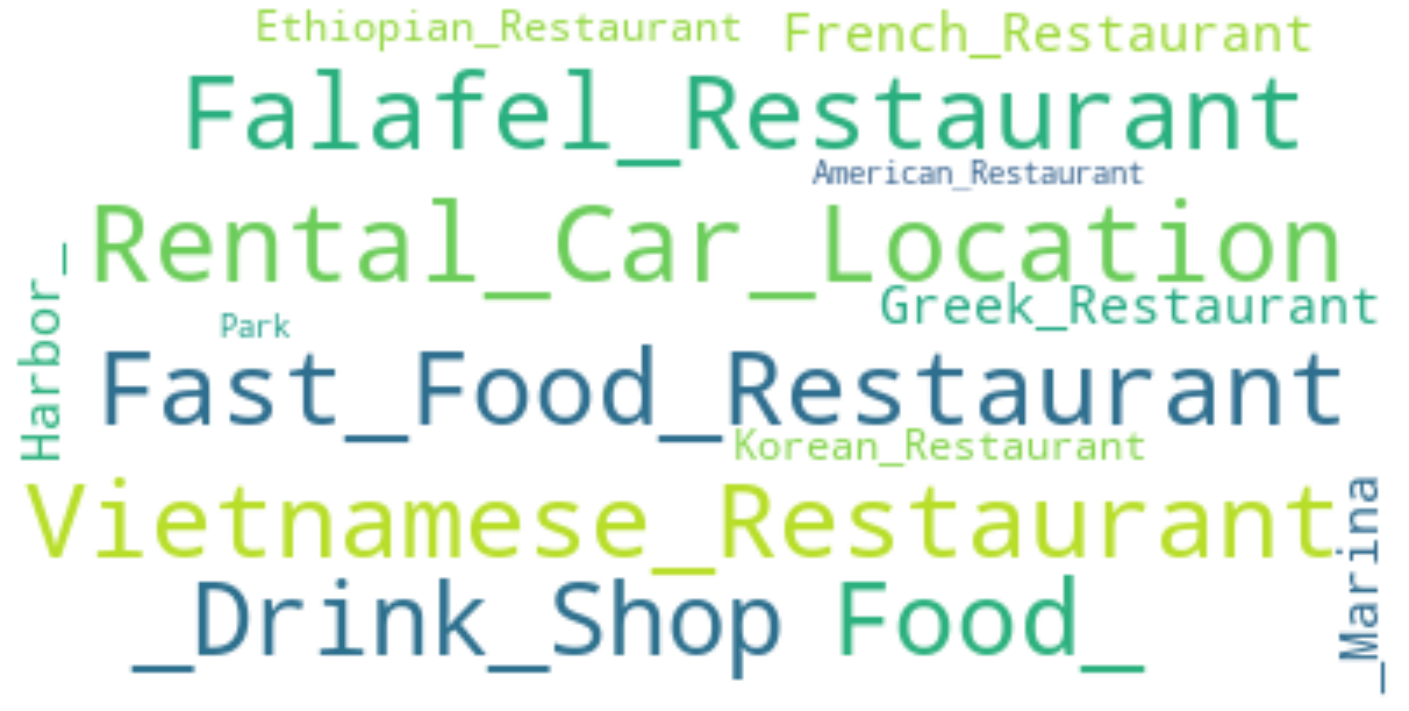

In [89]:
draw_wordcloud(boston_cluster5)

### Cluster 6

In [90]:
boston_cluster6 = boston_merged.loc[boston_merged['Cluster Labels'] == 6, boston_merged.columns[[0] + list(range(5, boston_merged.shape[1]))]]
boston_cluster6

Hotel 1st Most Common Venue  \
77          Boston Fire Department Eng 9 Ladder2    Mexican Restaurant   
142                                      Gate E3    Italian Restaurant   
155                            Boston Police D-4    Italian Restaurant   
215                             59 Putnam Street    Mexican Restaurant   
216                              56 Beacon Sweet    Mexican Restaurant   
217                              boston engine 5    Italian Restaurant   
225  The Prescott International Hotel And Hostel  Brazilian Restaurant   

         2nd Most Common Venue      3rd Most Common Venue  \
77                        Park         Italian Restaurant   
142         Chinese Restaurant        Peruvian Restaurant   
155        American Restaurant         Mexican Restaurant   
215         Italian Restaurant                       Park   
216        American Restaurant            Thai Restaurant   
217       Brazilian Restaurant  Latin American Restaurant   
225  Latin American Restaurant                     Bakery   

         4th Most Common Venue 5th Most Common Venue  \
77             Harbor / Marina     Indian Restaurant   
142  Latin American Restaurant    Mexican Restaurant   
155                       Park            Steakhouse   
215  Latin American Restaurant       Harbor / Marina   
216         Spanish Restaurant       Harbor / Marina   
217         Mexican Restaurant    Chinese Restaurant   
225         Chinese Restaurant        Breakfast Spot   

         6th Most Common Venue      7th Most Common Venue  \
77                      Bakery         Falafel Restaurant   
142  South American Restaurant          Food & Drink Shop   
155                   Pharmacy  Latin American Restaurant   
215       Brazilian Restaurant         Falafel Restaurant   
216      Vietnamese Restaurant           Greek Restaurant   
217                       Park        Peruvian Restaurant   
225                 Restaurant          Hotpot Restaurant   

        8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
77       Fast Food Restaurant     Food & Drink Shop      French Restaurant  
142     Vietnamese Restaurant    Falafel Restaurant   Fast Food Restaurant  
155  Mediterranean Restaurant                Bakery      French Restaurant  
215      Fast Food Restaurant     Food & Drink Shop      French Restaurant  
216      Ethiopian Restaurant    Falafel Restaurant   Fast Food Restaurant  
217      Fast Food Restaurant     Food & Drink Shop      French Restaurant  
225            History Museum     Indian Restaurant          Historic Site

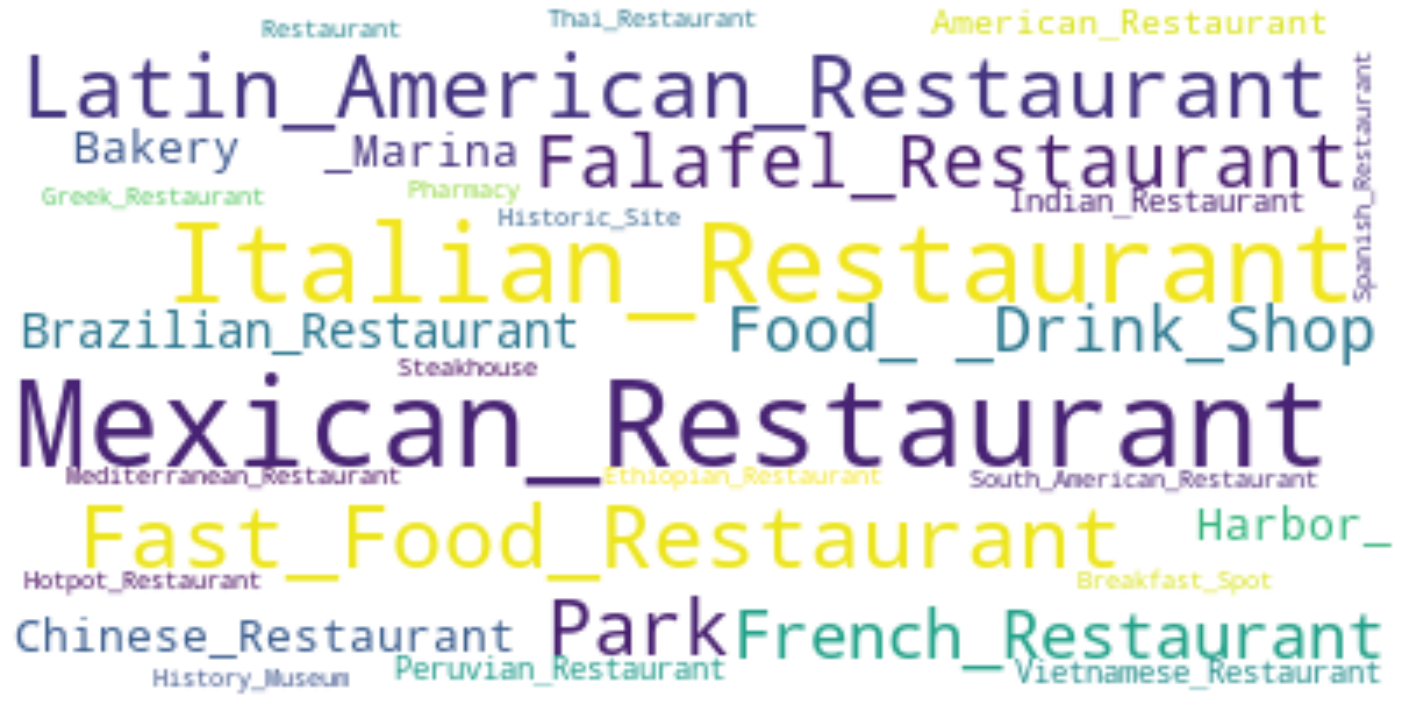

In [91]:
draw_wordcloud(boston_cluster6)